# Introduction

## Save As a Csv

#### Preparing the ground 

##### Install and import necessary libraries

In [2]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import os

##### ploty configurations

In [3]:
import plotly.express as px
import plotly.offline as py
import plotly.io as pio
import plotly.graph_objects as go
pio.templates.default = "plotly_dark"
py.init_notebook_mode(connected=True)

#### Path specified

In [4]:
DATA_DIR = 'data'
LABEL_DIR = 'trainval.csv'
IMAGE_DIR = os.path.join(DATA_DIR, 'DaanForestPark')

#### Label record 

In [5]:
# label_df = pd.read_csv(LABEL_DIR, names=['dirpath', 'target'])
label_df = pd.read_csv(LABEL_DIR )
label_df.head()

dirpath            target  label
0   train/alpine sea holly/5283.jpeg  alpine sea holly    0.0
1    train/alpine sea holly/937.jpeg  alpine sea holly    0.0
2  train/alpine sea holly/11911.jpeg  alpine sea holly    0.0
3   train/alpine sea holly/2250.jpeg  alpine sea holly    0.0
4   train/alpine sea holly/2740.jpeg  alpine sea holly    0.0

#### Encode the target using categorical labeling

In [6]:
label_df['label'] = label_df.target.astype('category').cat.codes
label_df.head()

dirpath            target  label
0   train/alpine sea holly/5283.jpeg  alpine sea holly      0
1    train/alpine sea holly/937.jpeg  alpine sea holly      0
2  train/alpine sea holly/11911.jpeg  alpine sea holly      0
3   train/alpine sea holly/2250.jpeg  alpine sea holly      0
4   train/alpine sea holly/2740.jpeg  alpine sea holly      0

#### How many categories ?

In [7]:
label_df['label'].nunique()

105

#### The distribution of actual labels

In [8]:
label_df['label'].max(),label_df['label'].min()

(103, -1)

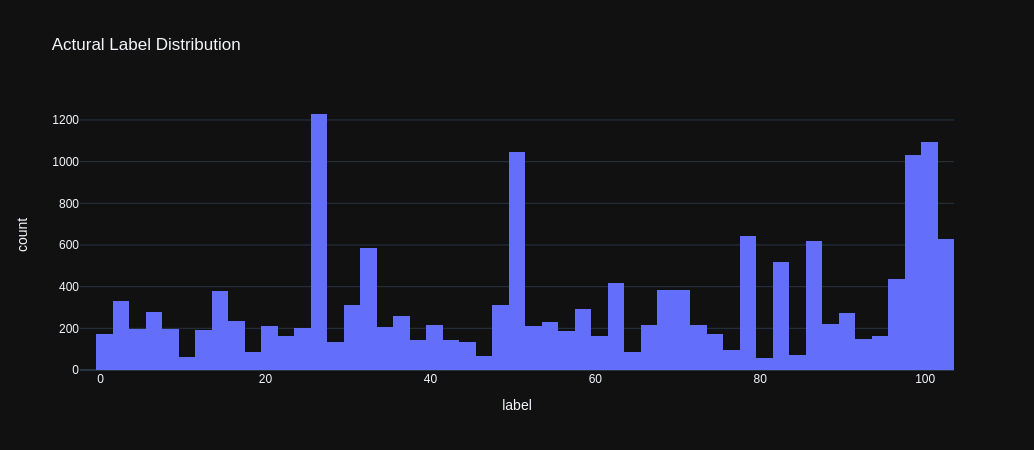

In [9]:
fig = px.histogram(label_df,
                   x="label",
                   title='Actural Label Distribution',
                   hover_data=label_df.columns)
fig.show()

### What data can't be identify

In [84]:
df = pd.read_csv('mydump/result/combined.csv')
df.rename({df.columns[0]:'target'}, axis='columns', inplace=True)
df.head()

target     metric    1         2    3         4         5  \
0    common tulip     recall  0.0  0.080823  0.0  0.036738  0.080823   
1  blanket flower  precision  0.0  0.000000  0.0  0.000000  0.000000   
2     desert-rose     recall  0.0  0.000000  0.0  0.000000  0.000000   
3       sweet pea     recall  0.0  0.000000  0.0  0.000000  0.000000   
4       columbine     recall  0.0  0.000000  0.0  0.000000  0.000000   

          6         7         8  ...        14        15        16        17  \
0  0.036738  0.095518  0.132256  ...  0.051433  0.036738  0.058780  0.058780   
1  0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000  0.000000   
2  0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000  0.000000   
3  0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000  0.000000   
4  0.000000  0.000000  0.000000  ...  0.041494  0.041494  0.041494  0.124481   

         18        19        20        21        22        23  
0  0.036738  0.088170  0.066128  0.132256  0.080823  0.117561  
1  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  
2  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  
3  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  
4  0.041494  0.082988  0.000000  0.082988  0.041494  0.041494  

[5 rows x 25 columns]

In [85]:
x = label_df[['label','target']]  # df2 but only with columns x, a, and b
df = df.merge(x)

In [86]:
df.head()

target  metric    1         2    3         4         5         6  \
0  common tulip  recall  0.0  0.080823  0.0  0.036738  0.080823  0.036738   
1  common tulip  recall  0.0  0.080823  0.0  0.036738  0.080823  0.036738   
2  common tulip  recall  0.0  0.080823  0.0  0.036738  0.080823  0.036738   
3  common tulip  recall  0.0  0.080823  0.0  0.036738  0.080823  0.036738   
4  common tulip  recall  0.0  0.080823  0.0  0.036738  0.080823  0.036738   

          7         8  ...        15       16       17        18       19  \
0  0.095518  0.132256  ...  0.036738  0.05878  0.05878  0.036738  0.08817   
1  0.095518  0.132256  ...  0.036738  0.05878  0.05878  0.036738  0.08817   
2  0.095518  0.132256  ...  0.036738  0.05878  0.05878  0.036738  0.08817   
3  0.095518  0.132256  ...  0.036738  0.05878  0.05878  0.036738  0.08817   
4  0.095518  0.132256  ...  0.036738  0.05878  0.05878  0.036738  0.08817   

         20        21        22        23  label  
0  0.066128  0.132256  0.080823  0.117561     27  
1  0.066128  0.132256  0.080823  0.117561     27  
2  0.066128  0.132256  0.080823  0.117561     27  
3  0.066128  0.132256  0.080823  0.117561     27  
4  0.066128  0.132256  0.080823  0.117561     27  

[5 rows x 26 columns]

### Peek Precision

In [87]:
# the last entry
prec = df[df['metric']=='precision'].iloc[:,-2:].rename(columns={df.columns[-2]: "prec"})
prec.head()

prec  label
504  0.117561     27
505  0.117561     27
506  0.117561     27
507  0.117561     27
508  0.117561     27

In [88]:
zero_label = prec[prec['prec'] == 0]['label'].unique()

In [89]:
label_df['prec=0'] = label_df['label'].apply(lambda x: x in zero_label)

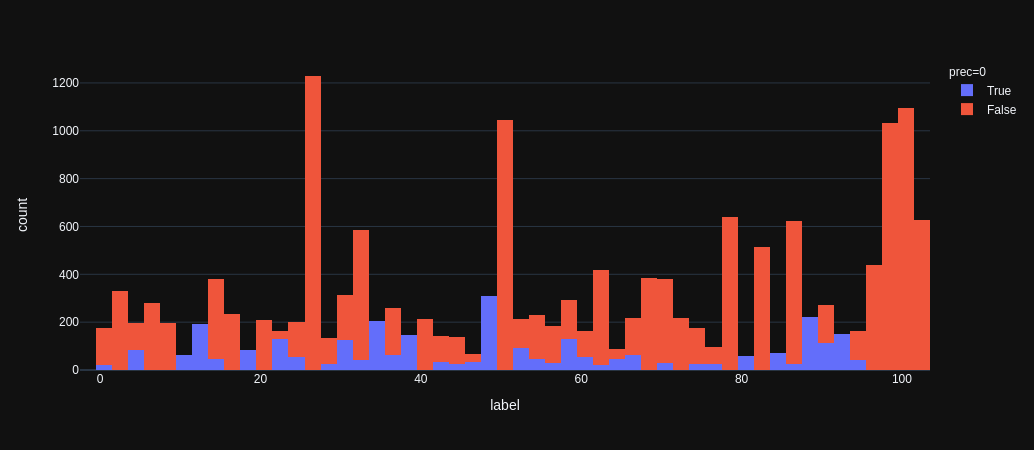

In [91]:
import plotly.express as px
df = px.data.tips()
fig = px.histogram(label_df, x="label", color="prec=0")
fig.show()

## Visualization on Valid

In [128]:
import os
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
from tqdm import tqdm
import cv2
tqdm.pandas() 

import plotly.express as px
import plotly.offline as py
import plotly.figure_factory as ff
import plotly.io as pio
import plotly.graph_objects as go
pio.templates.default = "plotly_dark"
py.init_notebook_mode(connected=True)

In [114]:
label_df = pd.read_csv('trainval.csv')
label_df.head()

dirpath            target  label
0  train/alpine sea holly  alpine sea holly      0
1  train/alpine sea holly  alpine sea holly      0
2  train/alpine sea holly  alpine sea holly      0
3  train/alpine sea holly  alpine sea holly      0
4  train/alpine sea holly  alpine sea holly      0

In [115]:
_images = []
_labels = []
_name = []
image_dir = 'data/jpeg-224x224/val'
for subdir, dirs, files in tqdm(os.walk(image_dir)):
    for filename in files:
        cur_p = subdir + os.sep + filename
        corr_label = label_df[label_df['dirpath']==os.sep.join(cur_p.split(os.sep)[2:-1])]
        if corr_label.size!= 0 and filename.endswith('jpeg'):
            _images.append(cur_p)
            _labels.append(corr_label['label'].values[0])
            _name.append(corr_label['target'].values[0])

105it [00:04, 21.00it/s]


In [116]:
_images[0], _labels[0], _name[0]

('data/jpeg-224x224/val/purple coneflower/12939.jpeg', 76, 'purple coneflower')

In [117]:
import cv2
def load_image(image):
    image = cv2.imread(image)
    return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [118]:
df = pd.DataFrame({'dir':_images, 'target':_name, 'label':_labels})
df.head()

dir             target  label
0  data/jpeg-224x224/val/purple coneflower/12939....  purple coneflower     76
1  data/jpeg-224x224/val/purple coneflower/13405....  purple coneflower     76
2  data/jpeg-224x224/val/purple coneflower/15735....  purple coneflower     76
3  data/jpeg-224x224/val/purple coneflower/16448....  purple coneflower     76
4  data/jpeg-224x224/val/purple coneflower/14368....  purple coneflower     76

In [125]:
train_images = df['dir'].apply(load_image)

In [126]:
red_values = [np.mean(train_images[idx][:, :, 0]) for idx in range(len(train_images))]
green_values = [np.mean(train_images[idx][:, :, 1]) for idx in range(len(train_images))]
blue_values = [np.mean(train_images[idx][:, :, 2]) for idx in range(len(train_images))]
values = [np.mean(train_images[idx]) for idx in range(len(train_images))]

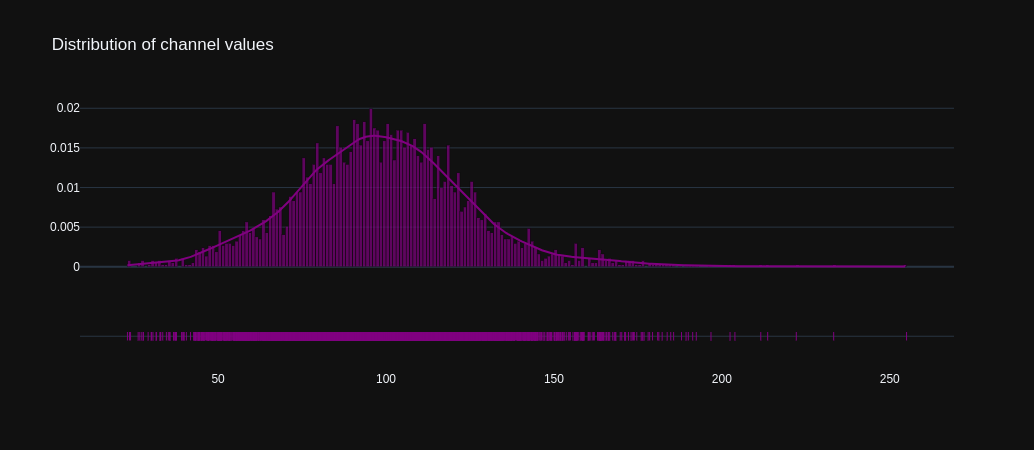

In [129]:
fig = ff.create_distplot([values], group_labels=["Channels"], colors=["purple"])
fig.update_layout(showlegend=False)
fig.update_layout(title_text="Distribution of channel values")
fig.data[0].marker.line.color = 'rgb(0, 0, 0)'
fig.data[0].marker.line.width = 0.5
fig

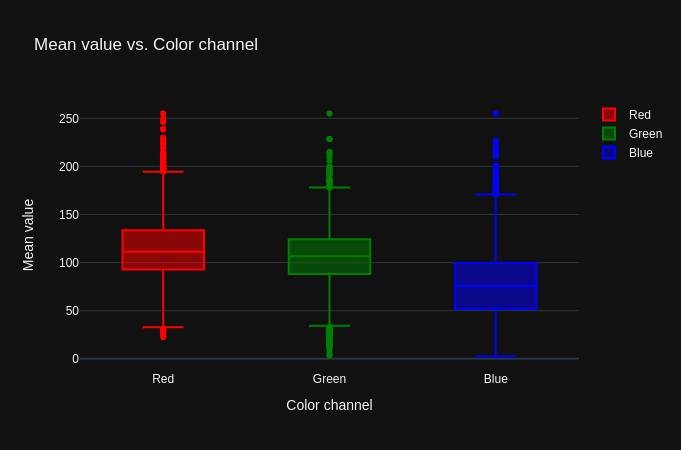

In [130]:
fig = go.Figure()

for idx, values in enumerate([red_values, green_values, blue_values]):
    if idx == 0:
        color = "Red"
    if idx == 1:
        color = "Green"
    if idx == 2:
        color = "Blue"
    fig.add_trace(go.Box(x=[color]*len(values), y=values, name=color, marker=dict(color=color.lower())))
    
fig.update_layout(yaxis_title="Mean value", xaxis_title="Color channel",
                  title="Mean value vs. Color channel")

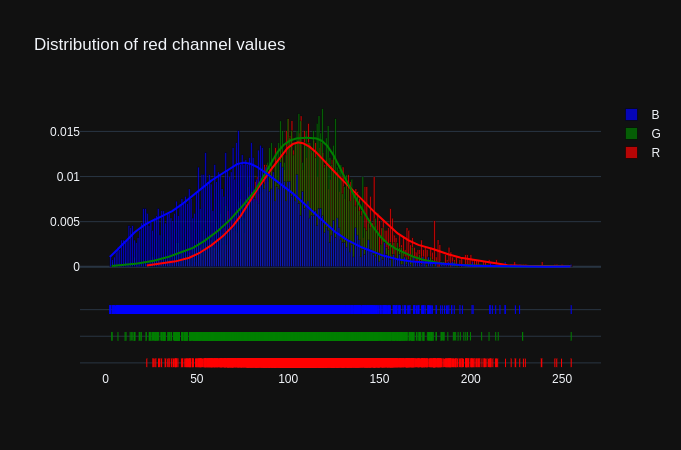

In [131]:
fig = ff.create_distplot([red_values, green_values, blue_values],
                         group_labels=["R", "G", "B"],
                         colors=["red", "green", "blue"])
fig.update_layout(title_text="Distribution of red channel values")
fig.data[0].marker.line.color = 'rgb(0, 0, 0)'
fig.data[0].marker.line.width = 0.5
fig.data[1].marker.line.color = 'rgb(0, 0, 0)'
fig.data[1].marker.line.width = 0.5
fig.data[2].marker.line.color = 'rgb(0, 0, 0)'
fig.data[2].marker.line.width = 0.5
fig

In [133]:
category_ind = df['label'].unique()
category = df['target'].nunique()
category

104

In [134]:
proj = pd.DataFrame({'r':red_values,'g':green_values, 'b':blue_values,'target': df['target'],'label':df['label']})

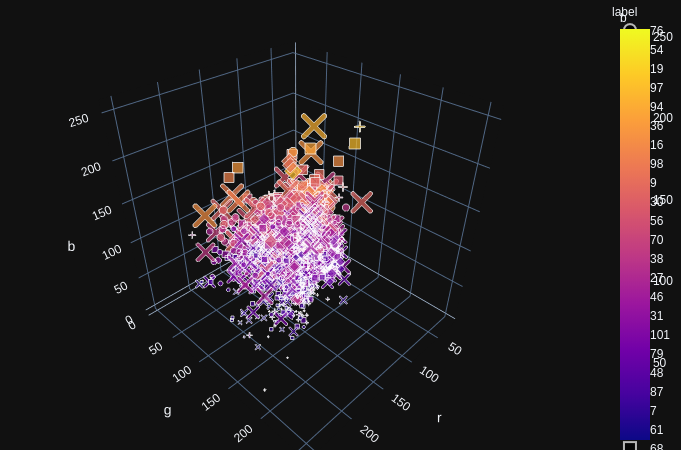

In [135]:
fig = px.scatter_3d(proj, x='r', y='g', z='b',
              color='b', size='b', size_max=18,
              symbol='label', opacity=0.7)
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))